In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df=pd.read_csv('audi.csv')

In [4]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


Devo fare OH encoding per la colonna categorica 'origin'

In [5]:
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [6]:
#Convert year column to object so we can include it in the categorical mask
df['year']=df['year'].astype(object)

In [7]:
# Create a boolean mask for categorical columns
categorical_mask = (df.dtypes == object)

In [8]:
categorical_columns = df.columns[categorical_mask].tolist()

In [9]:
print(df[categorical_columns].head())

  model  year transmission fuelType
0    A1  2017       Manual   Petrol
1    A6  2016    Automatic   Diesel
2    A1  2016       Manual   Petrol
3    A4  2017    Automatic   Diesel
4    A3  2019       Manual   Petrol


In [11]:
df[categorical_columns].describe()

,model,year,transmission,fuelType
count,10668,10668,10668,10668
unique,26,21,3,3
top,A3,2019,Manual,Diesel
freq,1929,3197,4369,5577


In [135]:
#COLUMN TRANSFORMER to get OH conded cols!
#This allows us to skip the label encoder and directly apply the one hot encoding!


#from sklearn.preprocessing import OneHotEncoder
#from sklearn.compose import ColumnTransformer
#ct = ColumnTransformer([(categorical_columns, OneHotEncoder(), [0])], remainder = 'passthrough')
#df[categorical_columns] = ct.fit_transform(df[categorical_columns])

In [136]:
#Use get dummies instead of one hot encoding, I still dont knoe the difference btw dummies and OHE

#Create a copy of the DF where we substitue the categorical column into more cols with dummies
encoded_df=df.copy()
encoded_df = pd.concat([df.drop(categorical_columns, axis=1), pd.get_dummies(df[categorical_columns], drop_first=True)], axis=1)

In [137]:
encoded_df.head()

,price,mileage,tax,mpg,engineSize,model_ A2,model_ A3,model_ A4,model_ A5,model_ A6,...,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020,transmission_Manual,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Petrol
0,12500,15735,150,55.4,1.4,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
1,16500,36203,20,64.2,2.0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,11000,29946,30,55.4,1.4,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
3,16800,25952,145,67.3,2.0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,17300,1998,145,49.6,1.0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,1


I have 54 columns: 5 (numeric_cols) + 53 (unique cateogric_cols) - 4 (drop first dummies) = 54

Now the data is ready for the learning

### Prepare the data for learning

In [245]:
X=encoded_df.drop('price', axis = 1).values

In [246]:
y=encoded_df['price'].values

In [247]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 69)

In [248]:
scaler = StandardScaler()

In [249]:
scaler.fit(X_train)

StandardScaler()

In [250]:
X_train = scaler.transform(X_train)          # Apply Standardization on X_train
X_test = scaler.transform(X_test)            # Apply Standardization on X_test

## Support Vector Regression

In [374]:
from sklearn.svm import SVR

In [375]:
param_SVM = {'C':np.arange(1000,10000,100),
            'gamma':np.arange(0.0001, 0.5, 0.001)}

In [376]:
svr_model=SVR()

In [377]:
cv_SVM = RandomizedSearchCV(estimator=svr_model, param_distributions = param_SVM, n_iter=10, cv = 3)

In [378]:
cv_SVM.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=SVR(),
                   param_distributions={'C': array([1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000,
       2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100,
       3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200,
       4300, 4400, 4500, 4600, 4700, 4800, 4900, 5000, 5100, 5200, 5300,
       5400, 5500, 5600, 5700, 5800, 5900, 6000, 6100, 6200, 6300, 6400,
       650...
       4.621e-01, 4.631e-01, 4.641e-01, 4.651e-01, 4.661e-01, 4.671e-01,
       4.681e-01, 4.691e-01, 4.701e-01, 4.711e-01, 4.721e-01, 4.731e-01,
       4.741e-01, 4.751e-01, 4.761e-01, 4.771e-01, 4.781e-01, 4.791e-01,
       4.801e-01, 4.811e-01, 4.821e-01, 4.831e-01, 4.841e-01, 4.851e-01,
       4.861e-01, 4.871e-01, 4.881e-01, 4.891e-01, 4.901e-01, 4.911e-01,
       4.921e-01, 4.931e-01, 4.941e-01, 4.951e-01, 4.961e-01, 4.971e-01,
       4.981e-01, 4.991e-01])})

In [379]:
y_pred_SVM = cv_SVM.predict(X_test)

In [380]:
# Compute and print the metrics
print("Tuned SVM parameters: {}".format(cv_SVM.best_params_))

Tuned SVM parameters: {'gamma': 0.0891, 'C': 6700}


## XGB

In [383]:
import xgboost as xgb

In [384]:
# Create the parameter grid
param_grid = {
    'learning_rate': np.arange(0.0001, 0.5, 0.01),
    'max_depth': np.arange(3, 30, 1),
    'n_estimators': np.arange(50, 200, 10)
}

In [385]:
xgb_model=xgb.XGBRegressor()

In [386]:
rand_neg_mse = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, n_iter=10, scoring='neg_mean_squared_error', cv=3)

In [387]:
rand_neg_mse.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
       3.601e-01, 3.701e-01, 3.801e-01, 3.901e-01, 4.001e-01, 4.101e-01,
       4.201e-01, 4.301e-01, 4.401e-01, 4.501e-01, 4.601e-01, 4.701e-01,
       4.801e-01, 4.901e-01]),
             

In [388]:
print("Best rmse:", np.sqrt(np.abs(rand_neg_mse.best_score_)))

Best rmse: 2694.680091919489


In [389]:
print("Best model: ", rand_neg_mse.best_estimator_)

Best model:  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.07010000000000001, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=140, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)


In [390]:
y_pred_RND = rand_neg_mse.predict(X_test)

In [391]:
# Compute and print the metrics
print("Tuned XGB parameters by RandomizedGridSearch: {}".format(rand_neg_mse.best_params_))

Tuned XGB parameters by RandomizedGridSearch: {'n_estimators': 140, 'max_depth': 7, 'learning_rate': 0.07010000000000001}


## XGB with Hyperopt by Baesian method

In [398]:
import hyperopt
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

In [400]:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'learning_rate': hp.choice("learning_rate", np.arange(0.0001, 0.5, 0.01)),
      }

In [401]:
def hyperparameter_tuning(space):
    print(space)
    model = xgb.XGBRegressor(max_depth = int(space['max_depth']),
                           min_child_weight=space['min_child_weight'],
                           gamma = space['gamma'],
                           reg_alpha = int(space['reg_alpha']),
                           reg_lambda = space['reg_lambda'],
                            learning_rate=space['learning_rate'])

    eval_set  = [( X_train, y_train), ( X_test, y_test)]

    model.fit(X_train, y_train,
            eval_set=eval_set, eval_metric="rmse",
            early_stopping_rounds=10,verbose=False)

    pred = model.predict(X_test)
    mse_scr = mean_squared_error(y_test, pred)
    print("SCORE:", np.sqrt(mse_scr))
    #change the metric if you like
    return {'loss':mse_scr, 'status': STATUS_OK }

In [402]:
trials = Trials()
best = fmin(fn=hyperparameter_tuning,
            space=space,
            algo=tpe.suggest,
            max_evals=100,
            trials=trials)

print (best)

{'gamma': 7.28776581508298, 'learning_rate': 0.3601, 'max_depth': 12.0, 'min_child_weight': 7.0, 'reg_alpha': 126.0, 'reg_lambda': 0.6443987149028455}
SCORE:                                                                                                                 
2440.828090334427                                                                                                      
{'gamma': 5.3332099057737015, 'learning_rate': 0.0101, 'max_depth': 16.0, 'min_child_weight': 2.0, 'reg_alpha': 155.0, 'reg_lambda': 0.40751642209540573}
SCORE:                                                                                                                 
9767.960935460118                                                                                                      
{'gamma': 7.626140071460382, 'learning_rate': 0.1701, 'max_depth': 11.0, 'min_child_weight': 10.0, 'reg_alpha': 123.0, 'reg_lambda': 0.650329568578954}
SCORE:                                                         

SCORE:                                                                                                                 
2425.1514283837955                                                                                                     
{'gamma': 7.176224685534864, 'learning_rate': 0.48009999999999997, 'max_depth': 7.0, 'min_child_weight': 7.0, 'reg_alpha': 117.0, 'reg_lambda': 0.38576405532376223}
SCORE:                                                                                                                 
2437.867269898493                                                                                                      
{'gamma': 8.366215160630384, 'learning_rate': 0.3901, 'max_depth': 9.0, 'min_child_weight': 5.0, 'reg_alpha': 60.0, 'reg_lambda': 0.5729919916160073}
SCORE:                                                                                                                 
2441.732921032895                                                                    

2293.1281790255716                                                                                                     
{'gamma': 1.0419907116595324, 'learning_rate': 0.1101, 'max_depth': 6.0, 'min_child_weight': 3.0, 'reg_alpha': 141.0, 'reg_lambda': 0.20858883490422545}
SCORE:                                                                                                                 
2491.6731789064847                                                                                                     
{'gamma': 1.5592069486600066, 'learning_rate': 0.2801, 'max_depth': 4.0, 'min_child_weight': 2.0, 'reg_alpha': 125.0, 'reg_lambda': 0.055393624388020646}
SCORE:                                                                                                                 
2581.059115130094                                                                                                      
{'gamma': 2.2146057934364842, 'learning_rate': 0.4901, 'max_depth': 9.0, 'min_child_weight': 

In [403]:
print("The best hyperparameters are : ","\n")
print(best)

The best hyperparameters are :  

{'gamma': 2.7646352837742203, 'learning_rate': 35, 'max_depth': 7.0, 'min_child_weight': 3.0, 'reg_alpha': 101.0, 'reg_lambda': 0.06854151297791622}


In [404]:
xgb_opt = xgb.XGBRegressor(max_depth = int(best['max_depth']),
                       gamma = best['gamma'],
                       reg_lambda = best['reg_lambda'],
                       reg_alpha = best['reg_alpha'],
                       min_child_weight = best['min_child_weight'])

In [405]:
xgb_opt.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=2.7646352837742203,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=7,
             min_child_weight=3.0, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=101.0, reg_lambda=0.06854151297791622,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [406]:
# Predicting the Test set results
y_pred_XGB_OPT = xgb_opt.predict(X_test)

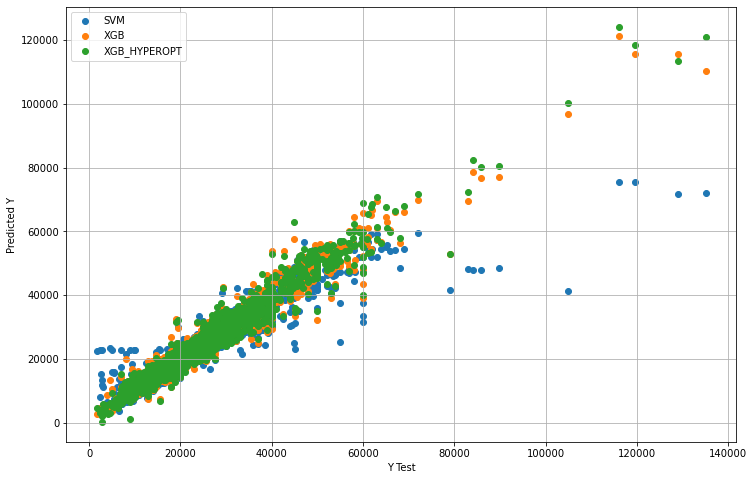

In [407]:
plt.figure(figsize = (12,8))

plt.scatter(y_test, y_pred_SVM, label='SVM')
plt.scatter(y_test, y_pred_RND, label='XGB')
plt.scatter(y_test, y_pred_XGB_OPT, label='XGB_HYPEROPT')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.legend(loc='upper left');
plt.grid()

In [408]:
mse_SVM = mean_squared_error(y_test, y_pred_SVM)
mse_XGB_OPT = mean_squared_error(y_test, y_pred_XGB_OPT)
print("RMSE using SVM: ", np.sqrt(mse_SVM))
print("RMSE using XGB: ", np.sqrt(np.abs(rand_neg_mse.best_score_)))
print("RMSE using XGB_HYPEROPT: ", np.sqrt(mse_XGB_OPT))

RMSE using SVM:  3948.9790284759224
RMSE using XGB:  2694.680091919489
RMSE using XGB_HYPEROPT:  2302.6736884942707


We get better results with XGBE and we can even improve the RMSE with the Baesian optimization